In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install statsmodels

In [5]:
!pip install seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [9]:
import pandas as pd

# Load CSV
df = pd.read_csv("Taiwan Semiconductor Stock Price History.csv")

# Automatically detect mixed date formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# Set Date as index
df.set_index('Date', inplace=True)

# Drop fully empty columns
df = df.dropna(axis=1, how='all')

# Preview the cleaned data
print(df.head())
print(df.info())


             Price    Open    High     Low    Vol. Change %
Date                                                       
2025-07-16  237.56  236.40  238.31  234.15  15.09M    0.26%
2025-07-15  236.95  234.46  237.71  233.85  14.27M    3.62%
2025-07-14  228.67  229.33  229.85  226.31  10.67M   -0.75%
2025-07-11  230.40  231.00  232.27  229.40   8.82M    0.28%
2025-07-10  229.76  232.78  233.05  227.77  13.12M   -0.90%
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2588 entries, 2025-07-16 to 2015-04-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2588 non-null   float64
 1   Open      2588 non-null   float64
 2   High      2588 non-null   float64
 3   Low       2588 non-null   float64
 4   Vol.      2588 non-null   object 
 5   Change %  2588 non-null   object 
dtypes: float64(4), object(2)
memory usage: 141.5+ KB
None


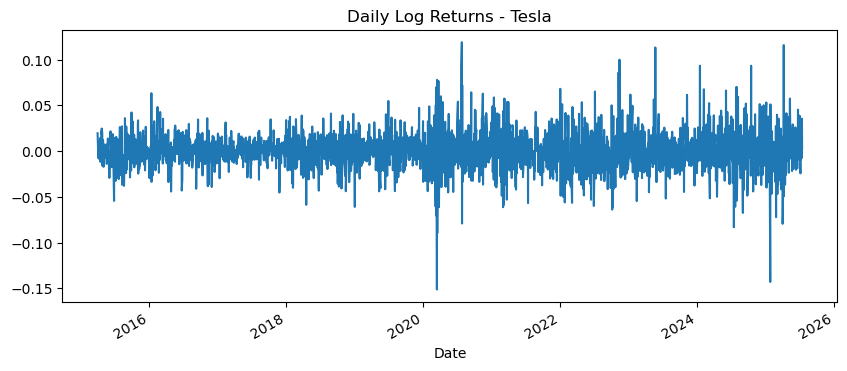

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Sort index (important if dates are reversed)
df.sort_index(inplace=True)

# Compute daily log returns
df['LogReturn'] = np.log(df['Price'] / df['Price'].shift(1))
returns = df['LogReturn'].dropna()

# Plot returns
returns.plot(title="Daily Log Returns - TSM", figsize=(10, 4))
plt.show()

In [11]:
!pip install arch

In [12]:
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

In [13]:
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

# ARCH LM test
test_stat, p_value, _, _ = het_arch(returns)

print(f"ARCH Test Statistic: {test_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ ARCH effects present (heteroskedasticity). Proceed with GARCH modeling.")
else:
    print("❌ No significant ARCH effects.")

ARCH Test Statistic: 212.6318
P-Value: 0.0000
✅ ARCH effects present (heteroskedasticity). Proceed with GARCH modeling.


In [14]:
# Fit GARCH(1,1) with normal errors
model = arch_model(returns, vol='GARCH', p=1, q=1, mean='Constant', dist='normal')
res = model.fit(disp='off')

print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              LogReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6545.94
Distribution:                  Normal   AIC:                          -13083.9
Method:            Maximum Likelihood   BIC:                          -13060.5
                                        No. Observations:                 2587
Date:                Thu, Jul 24 2025   Df Residuals:                     2586
Time:                        22:05:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0105e-03  4.910e-04      2.058  3.958e-02 [4.

C:\Users\hp\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004303. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


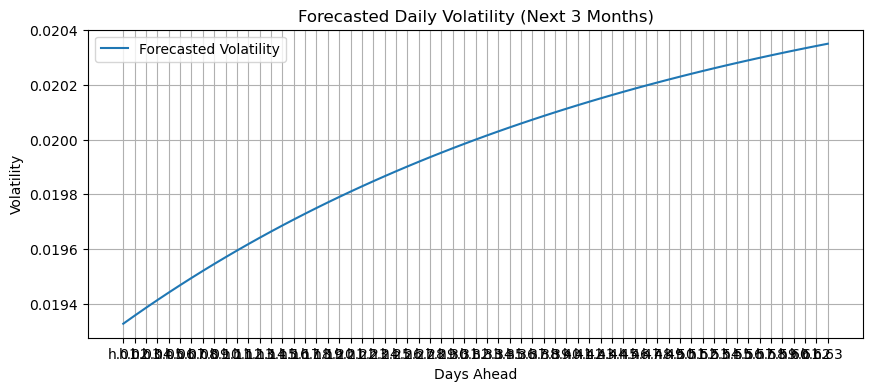

In [15]:
# Forecast 63 days ahead (approx. 3 months)
forecast_horizon = 63
forecast = res.forecast(horizon=forecast_horizon)

# Extract forecasted variance (convert to volatility)
variance_forecast = forecast.variance.iloc[-1]
vol_forecast = np.sqrt(variance_forecast)

# Plot forecasted volatility
plt.figure(figsize=(10, 4))
plt.plot(vol_forecast, label='Forecasted Volatility')
plt.title("Forecasted Daily Volatility (Next 3 Months)")
plt.xlabel("Days Ahead")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()